##Estimator validation
*  Use the estimator on a toy dataset to check that it is doing the right computations
* Dataset is from from [Stata's website](http://www.stata.com/support/faqs/statistics/intercept-in-fixed-effects-model/), which also includes the results from their implementation (xtreg, fe)

Notes:
* Download the *.py file into site-packages\sklearn\linear_model
* If X has only one variable, it needs to be reshaped into a (n, 1) array 

## Initialisation

In [2]:
from sklearn.linear_model.FixedEffects import FixedEffectsEstimator as fe
import pandas as pd
import numpy as np

In [3]:
y = [-5,23,44,29,26,17,17,31,50,26,17]
gps = [1,1,1,2,2,3,3,3,4,4,4]
x = [0,8,17,10,16,4,11,5,18,5,2]
data = pd.DataFrame({"group":gps, "x": x, "y":y})
data.head()

,group,x,y
0,1,0,-5
1,1,8,23
2,1,17,44
3,2,10,29
4,2,16,26


In [7]:
model = fe()
x = data["x"].values.reshape(-1, 1) 
model.fit(X = x, gps = list(data["group"]), y = list(data["y"].values))

FixedEffectsEstimator(copy_X=True, n_jobs=1)

## Compare coefficients vs stata results

In [17]:
print("Regressor coefficient is %s" % model.coef_)
print("Intercept coefficient is %s" % model.intercept_)
print("Coefficients of group intercepts are")
model.u_

Regressor coefficient is [ 2.]
Intercept coefficient is 7.54545454545
Coefficients of group intercepts are


,gps,gps_coef
0,1,-3.545455
1,2,-6.045455
2,3,0.787879
3,4,6.787879


In [19]:
4 - 2.5

1.5

Stata results are copied below.

* x and cons have similar coefficients
* Group intercepts also have similar coefficients - can be seen using the "regress" output
    * "regress y x i.group" effectively implements fixed effects using least square dummy variable (LSDV) i.e. by creating dummy variables for each group
    * Adding the model intercept to each group's intercept gives similar results, e.g. [python, group 1 intercept] 7.545 - 6.045 is similar to [stata, group 1 intercept] 4 - 2.5 



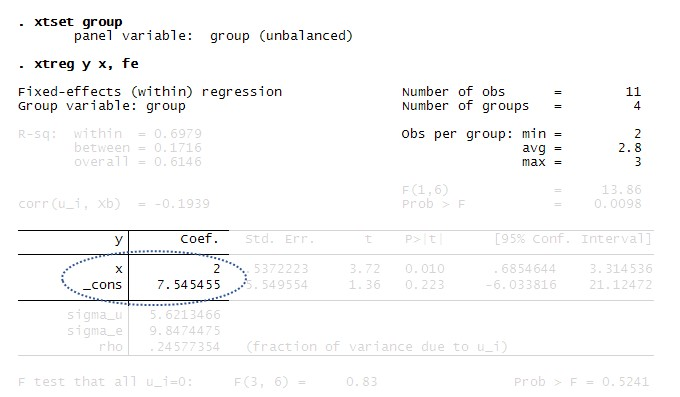

In [15]:
from IPython.display import Image
Image("fixed_effects/xtreg fe.jpg")

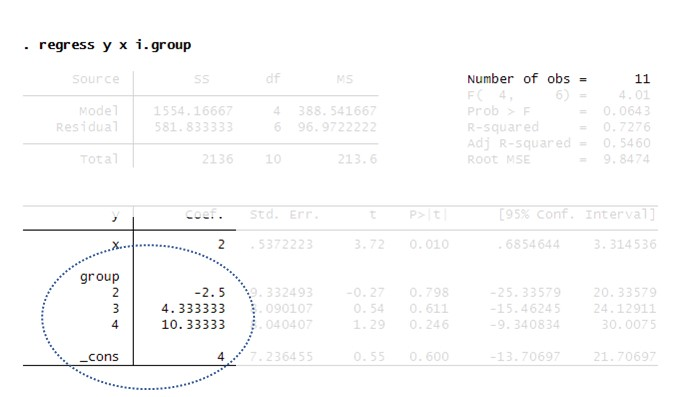

In [16]:
Image("fixed_effects/regress.jpg")

## Predict
* Simply input predictors and groups to generate predictions
* Groups must have been trained on before - otherwise model does not know their group-specific intercepts

In [20]:
gps_unseen = np.array([1,2,1, 2])
x_unseen = np.array([0.4,-3, 15, 0]).reshape(-1, 1)
model.predict(x_unseen, gps_unseen)

array([  4.8,  -2. ,  31.5,   1.5])

In [21]:
gps_unseen = np.array([1,2,1, 3456]) # last group not seen during training
x_unseen = np.array([0.4,-3, 15, 0]).reshape(-1, 1)
model.predict(x_unseen, gps_unseen)

Exception: Data to fit include unseen groups, e.g. 3456